In [160]:
%matplotlib notebook
import timeit
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import random

## Additional functions

In [161]:
# Функция "neib" берёт на входе координаты точки (ind - index), соседей которой нужно найти, и размер карты (m - map).
# на выходе, соответственно, получаем координаты соседей (8 штук).
def neib(ind, m):
    nb = []
    ind = np.array(ind) # переводим в массив для арифметики. Изначально - в tuple
    for i in range(-1, 2):
        for n in range(-1, 2): # берём все пары точек от -1 до 1
            if not (i == 0 and n == 0): # изначальная точка нас не интересует
                a = ind+np.array([i, n])
                for k in range(2): # так как координаты состоят из двух точек, нужно проверить каждую
                    if a[k] >= m: a[k] = a[k]-m # проверяем, входит ли эта точка в размер карты
                    elif a[k] < 0: a[k] = a[k]+m # и создаём периодичность карты - если точка зайдёт за границы, она "переместится" в начало или конец
                nb.append(tuple(a)) # возвращаем изначальный формат
    return nb

# функция "sumneib" считает сумму живых клеток вокруг. Берёт координаты соседей и старую матрицу, на основе которой будет решаться, кто выживает
def sumneib(neib, matrix): 
    summ = 0
    for k in neib:
        summ += matrix[k] # так как матрица состоит из 0 и 1, добавляем эти значения
    return summ

## The main function

In [162]:
# функция "game" получает на входе список с координатами изначальных точек (ind), размеры карты (m), количество поколений (gen - generation) 
# и скорость переключения слайдов в анимации в мс (sp - speed).

def game(ind, m = 20, gen = 100, sp = 300):
    y, x = zip(*ind) # делим координаты на х и у для визуализации 
    yaxis = [y] 
    xaxis = [x] # эти списки - база для анимации
    counter = 0 # счётчик поколений
    
    while counter <= gen:
        newind = [] # новые индексы - нужны для хранения будущего поколения
        was = [] # хранит клетки, которые уже проверялись на наличие соседей для "реинкарнации"
        old = np.zeros((m, m)) 
        for i in ind: old[i] = 1 # на матрицу помещаются точки уже существующего поколения 

        for single in ind: # берём все старые точки и смотрим, какие из них выживут
            summ = sumneib(neib(single, m=m), old)
            if summ == 3 or summ == 2:
                newind.append(single) # выжившие помещаются в новые индексы

            for new in neib(single, m = m): # чтобы найти новые точки для жизни, ищем их в соседях уже живых точек
                if old[new] == 0 and str(new) not in was: # точка должна быть мертва и не просмотрена
                    summ = sumneib(neib(new, m=m), old) # считаем уже их соседей
                    if summ == 3:
                        newind.append(new)
                        was.append(str(new)) # тип str необходим потому, что при конструкции х 'in' в приложении к координатам из двух точек
                                             # возникает ошибка при определении того, какая именно их двух точек (или обе) нужна.
                                             # str помогает избежать её и сравнить те же координаты
        
        if len(newind) > 0: # может не оказаться новых индексов
            y, x = zip(*newind) # также расщепляем индексы и помещаем их в координаты  
            yaxis.append(y)
            xaxis.append(x)
        else:
            yaxis.append(())
            xaxis.append(())
            
        ind = newind # старые становятся молодыми
        counter += 1
        
    fig, ax = plt.subplots()
    def update(curr): # вводим функцию для анимации
        if curr == gen or (xaxis[curr] == () and yaxis[curr] == ()): # останавлиеваем анимацию, если номер слайда равен количеству поколений
            a.event_source.stop() # или живых клеток больше нет
        ax.cla()
        ax.axis([-0.3,m+0.3,m+0.3,-0.3]) # расставляем границы с учётом размера карты
        ax.grid(True)
        ax.scatter(xaxis[curr], yaxis[curr], s = 2000/m) # размер точек меняется в зависимости от размера карты 
        ax.annotate('generation = {}'.format(curr), [(m/2)-(m*0.1), math.ceil(m/20)]) # счётчик поколений тоже
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        ax.tick_params(axis='x', which='major', labelsize = round(14-(m*2/10))) # и размер названий делений
        ax.tick_params(axis='y', which='major', labelsize = round(14-(m*2/10)))
         
    a = animation.FuncAnimation(fig, update, interval = sp)

## Game and shapes


In [163]:
glider = [(7,8), (8,9), (9,9), (9,8), (9,7)]
beacon = [(1,1), (2,2),(1,2),(2,1),(3,3),(4,4),(3,4),(4,3)]
penthadecathlon = [(5,4), (6,4),(7,4),(8,4),(9,4),(10,4),(11,4),(12,4), (5,5),(7,5),(8,5),(9,5),(10,5),(12,5), (5,6),(6,6),(7,6),(8,6),(9,6),(10,6),(11,6),(12,6)]
pulsar = [(5,3), (6,3), (7,3), (11,3), (12,3),(13,3),(3,5),(3,6),(3,7),(3,11),(3,12),(3,13),(8,5),(8,6),(8,7),(5,8),(6,8),(7,8),(10,5),(10,6),(10,7),(11,8),(12,8),(13,8),(15,5),(15,6),(15,7),(11,8),(12,8),(13,8),(11,10),(12,10),(13,10),(15,11),(15,12),(15,13),(5,10),(6,10),(7,10),(8,11),(8,12),(8,13),(10,11),(10,12),(10,13),(5,15),(6,15),(7,15),(11,15),(12,15),(13,15)]

<IPython.core.display.Javascript object>


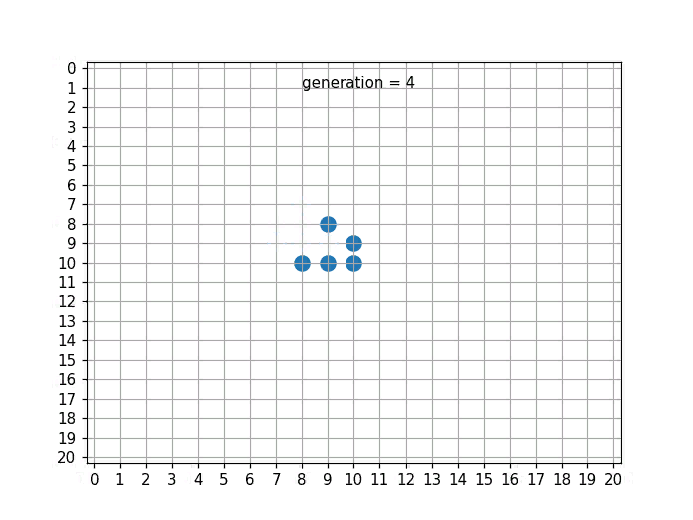

In [165]:
game(glider)

<IPython.core.display.Javascript object>


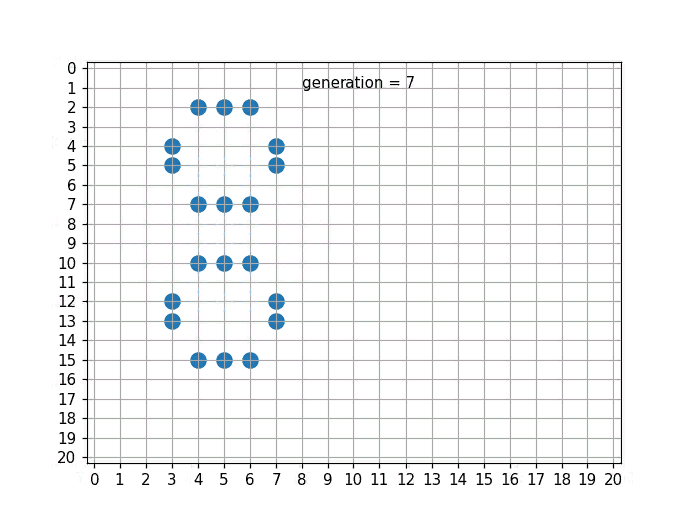

In [166]:
game(penthadecathlon)

<IPython.core.display.Javascript object>


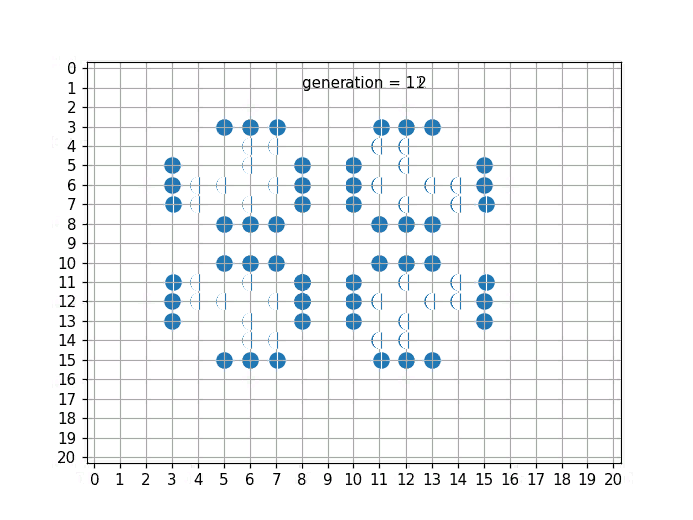

In [167]:
game(pulsar)

## Gaussian distribution

<IPython.core.display.Javascript object>


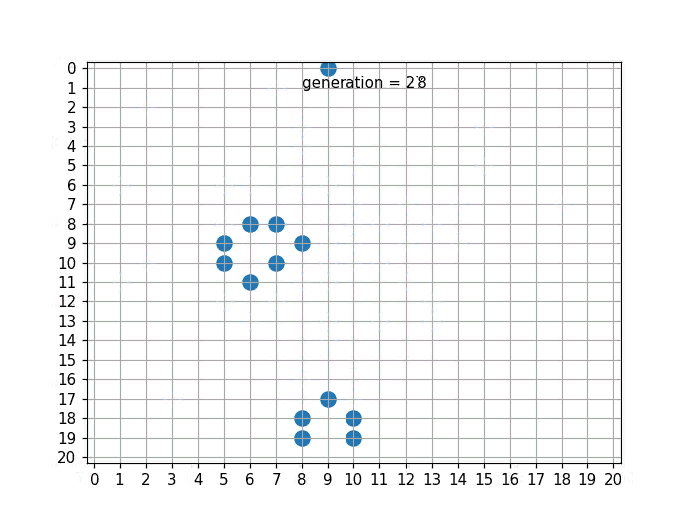

In [170]:
x = []
y = []

while len(x) != 50: x.append(round(random.gauss(9, 4)))
while len(y) != 50: y.append(round(random.gauss(9, 4)))

dat = list(zip(x, y))
game(dat) # лучше не брать размер матрицы меньше 20, иначе будет выход за границы изначальных индексов